### Recreated PDF analysis, old notebook was deleted along with the old data.

In [152]:
import csv
import folium
import gmaps
import gmaps.datasets
import matplotlib.pyplot as plt
import os
import pandas as pd
import pydeck as pdk
import seaborn as sns

In [153]:
path = os.getcwd() + '\\yt_main\\data\\only_in_japan__go'

In [154]:
df = pd.read_csv(path + '\\only_in_japan__go_data.csv')

In [15]:
df.head().transpose()

,0,1,2,3,4
categoryId,24,24,24,24,24
viewCount,22958,13821,19513,20763,37401
likeCount,1425,1171,1485,1305,1902
dislikeCount,21,26,41,41,70
favoriteCount,0,0,0,0,0
commentCount,91,98,78,65,283
actualStartTime,2020-08-15T05:53:17Z,2020-08-14T02:47:04Z,2020-08-13T06:26:15Z,2020-08-11T17:10:53.309000Z,2020-08-11T06:06:43Z
actualEndTime,2020-08-15T06:42:19Z,2020-08-14T03:21:35Z,2020-08-13T07:24:18Z,2020-08-11T18:09:28Z,2020-08-11T06:42:36Z
scheduledStartTime,2020-08-15T05:55:04Z,2020-08-14T02:45:00Z,2020-08-13T06:35:03Z,2020-08-11T17:05:00Z,2020-08-11T06:05:49Z
madeForkids,False,False,False,False,False


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
categoryId             300 non-null int64
viewCount              300 non-null int64
likeCount              300 non-null int64
dislikeCount           300 non-null int64
favoriteCount          300 non-null int64
commentCount           300 non-null int64
actualStartTime        298 non-null object
actualEndTime          298 non-null object
scheduledStartTime     298 non-null object
madeForkids            300 non-null bool
topicCategories        261 non-null object
relevantTopicIds       261 non-null object
locationDescription    255 non-null object
latitude               255 non-null float64
longitude              255 non-null float64
altitude               255 non-null float64
dtypes: bool(1), float64(3), int64(6), object(6)
memory usage: 35.5+ KB


In [17]:
df.describe()

,categoryId,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,latitude,longitude,altitude
count,300.0,300.000000,300.000000,300.000000,300.0,300.000000,255.000000,255.000000,255.0
mean,24.0,39418.286667,1593.753333,41.670000,0.0,158.466667,36.297493,136.577523,0.0
std,0.0,60351.631058,774.905535,38.072292,0.0,141.767942,2.404607,17.640967,0.0
min,24.0,7788.000000,398.000000,7.000000,0.0,26.000000,33.560945,11.095498,0.0
25%,24.0,19264.250000,1095.750000,22.000000,0.0,83.750000,35.661423,139.339084,0.0
50%,24.0,28256.500000,1447.000000,33.000000,0.0,121.000000,35.680400,139.767125,0.0
75%,24.0,40788.500000,1956.500000,49.000000,0.0,172.500000,35.702259,139.769017,0.0
max,24.0,940524.000000,6105.000000,508.000000,0.0,1062.000000,50.087569,144.089853,0.0


In [18]:
df['locationDescription'].nunique()

160

## Top 30 streaming locations

In [19]:
df.groupby('locationDescription').count().sort_values(by ='viewCount', ascending=False)['viewCount'][:30]

locationDescription
Tokyo                     56
Tokyo Station             14
Akihabara                  6
Hibiya Park                4
Sado Island                4
Nihonbashi                 3
Ginza                      3
Kōyashita Station          2
Jokiin                     2
Innsbruck                  2
Shibuya Station            2
Sumida River               2
Harajuku Station           2
Kyoto Station              2
Fukuoka Airport            2
Noboribetsu                2
Ogi Minato (Port) Park     2
Niigata                    2
Shinbashi                  2
Omicho Fish Market         1
Omi-Imazu Station          1
Omotesando Hills           1
Shimbashi Station          1
Noboribetsu Hot Spring     1
Shiga                      1
Noboribetsu Station        1
Shibuya Hikarie Mall       1
Odaiba                     1
Shibakoen                  1
Shiba Park 4th Block       1
Name: viewCount, dtype: int64

In [27]:
location = df[['locationDescription', 'latitude', 'longitude']]
location.dropna(inplace=True)

C:\Users\kai_t\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


locationDescription    0
latitude               0
longitude              0
dtype: int64

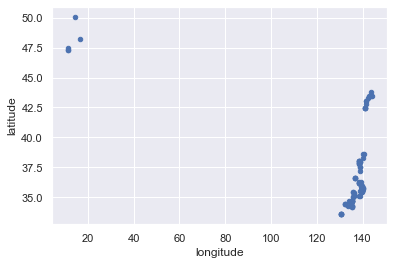

In [77]:
sns.set()
local.plot.scatter(x = 'longitude', y ='latitude')

## Top 10 location with the most viewers

In [42]:
df.groupby('locationDescription')['viewCount'].sum().sort_values(ascending=False).iloc[:10]

locationDescription
Tokyo                        2090067
鷲神社(浅草酉の市御本社)                 940524
Tokyo Station                 720143
Akihabara                     301847
Sado Island                   289968
Tokyo Dome                    223462
Noboribetsu Station           137922
Shinbashi                     135553
Ginza                         131222
Sega Akihabara Building 2     121210
Name: viewCount, dtype: int64

## Video distribution varying by month from the last 300 vids

In [155]:
df['actualStartTime'] = pd.to_datetime(df['actualStartTime'])

In [156]:
df['month'] = df['actualStartTime'].apply(lambda x: x.month)
df['hour'] = df['actualStartTime'].apply(lambda x: x.hour)
df['year'] = df['actualStartTime'].apply(lambda x: x.year)
df['weekday'] = df['actualStartTime'].apply(lambda x: x.weekday())

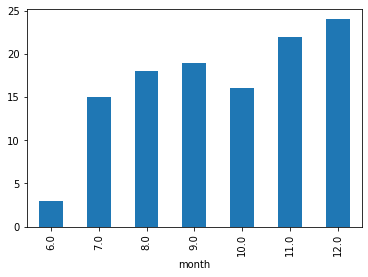

In [157]:
df[df.year == 2019].groupby('month').count()['viewCount'].plot.bar()

## Most upload in the week

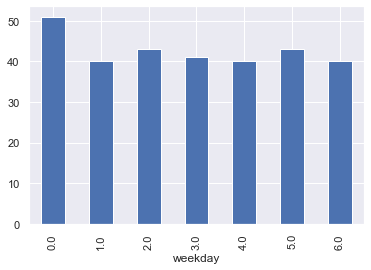

In [86]:
df.groupby('weekday').count()['viewCount'].plot.bar()

## Most viewed hours (UTC-9)

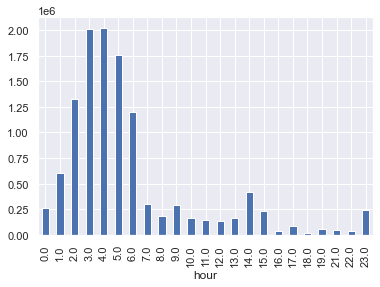

In [87]:
df.groupby('hour').sum()['viewCount'].plot.bar()

## Like/Dislike by weekday videos

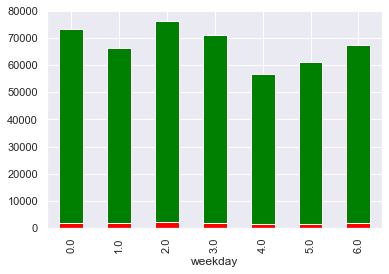

In [91]:
_, ax = plt.subplots()
df.groupby('weekday').sum()['likeCount'].plot(kind ='bar', ax=ax, color='green')
df.groupby('weekday').sum()['dislikeCount'].plot(kind ='bar', ax=ax, color='red')

## Views per month

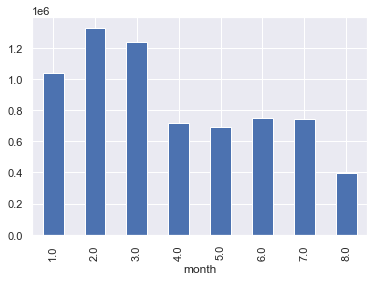

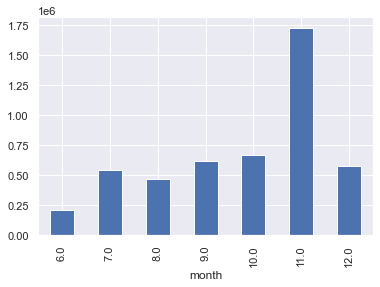

In [95]:
for mon in list(df['year'].dropna().unique()):
    df[df['year']==mon].groupby('month').sum()['viewCount'].plot.bar()
    plt.show()

In [96]:
df.head()

,categoryId,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,actualStartTime,actualEndTime,scheduledStartTime,madeForkids,topicCategories,relevantTopicIds,locationDescription,latitude,longitude,altitude,month,hour,year,weekday
0,24,22958,1425,21,0,91,2020-08-15 05:53:17+00:00,2020-08-15T06:42:19Z,2020-08-15T05:55:04Z,False,"['https://en.wikipedia.org/wiki/Vehicle', 'htt...","['/m/019_rr', '/m/07yv9', '/m/019_rr', '/m/07y...",Marunouchi,35.680406,139.766486,0.0,8.0,5.0,2020.0,5.0
1,24,13821,1171,26,0,98,2020-08-14 02:47:04+00:00,2020-08-14T03:21:35Z,2020-08-14T02:45:00Z,False,NaN,NaN,Nihonbashi,35.681184,139.774154,0.0,8.0,2.0,2020.0,4.0
2,24,19513,1485,41,0,78,2020-08-13 06:26:15+00:00,2020-08-13T07:24:18Z,2020-08-13T06:35:03Z,False,"['https://en.wikipedia.org/wiki/Tourism', 'htt...","['/m/019_rr', '/g/120yrv6h', '/m/019_rr', '/g/...",Hamarikyu Gardens,35.659737,139.763493,0.0,8.0,6.0,2020.0,3.0
3,24,20763,1305,41,0,65,2020-08-11 17:10:53.309000+00:00,2020-08-11T18:09:28Z,2020-08-11T17:05:00Z,False,NaN,NaN,NaN,NaN,NaN,NaN,8.0,17.0,2020.0,1.0
4,24,37401,1902,70,0,283,2020-08-11 06:06:43+00:00,2020-08-11T06:42:36Z,2020-08-11T06:05:49Z,False,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,"['/m/019_rr', '/m/019_rr']",Shinbashi,35.664829,139.756263,0.0,8.0,6.0,2020.0,1.0


In [6]:
df.describe()

,categoryId,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,latitude,longitude,altitude,month,hour,year,weekday
count,300.0,300.000000,300.000000,300.000000,300.0,300.000000,255.000000,255.000000,255.0,298.000000,298.000000,298.000000,298.000000
mean,24.0,39418.286667,1593.753333,41.670000,0.0,158.466667,36.297493,136.577523,0.0,6.302013,6.422819,2019.607383,2.899329
std,0.0,60351.631058,774.905535,38.072292,0.0,141.767942,2.404607,17.640967,0.0,3.360906,5.095296,0.489154,2.035857
min,24.0,7788.000000,398.000000,7.000000,0.0,26.000000,33.560945,11.095498,0.0,1.000000,0.000000,2019.000000,0.000000
25%,24.0,19264.250000,1095.750000,22.000000,0.0,83.750000,35.661423,139.339084,0.0,3.000000,3.000000,2019.000000,1.000000
50%,24.0,28256.500000,1447.000000,33.000000,0.0,121.000000,35.680400,139.767125,0.0,6.000000,5.000000,2020.000000,3.000000
75%,24.0,40788.500000,1956.500000,49.000000,0.0,172.500000,35.702259,139.769017,0.0,9.000000,8.000000,2020.000000,5.000000
max,24.0,940524.000000,6105.000000,508.000000,0.0,1062.000000,50.087569,144.089853,0.0,12.000000,23.000000,2020.000000,6.000000


## Simple prediction

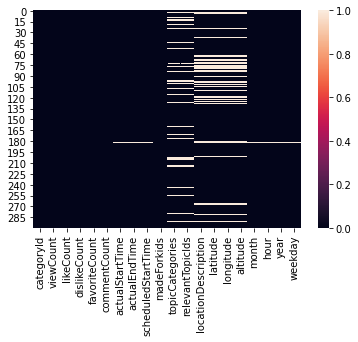

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.head()

,categoryId,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,actualStartTime,actualEndTime,scheduledStartTime,madeForkids,topicCategories,relevantTopicIds,locationDescription,latitude,longitude,altitude,month,hour,year,weekday
0,24,22958,1425,21,0,91,2020-08-15 05:53:17+00:00,2020-08-15T06:42:19Z,2020-08-15T05:55:04Z,False,"['https://en.wikipedia.org/wiki/Vehicle', 'htt...","['/m/019_rr', '/m/07yv9', '/m/019_rr', '/m/07y...",Marunouchi,35.680406,139.766486,0.0,8.0,5.0,2020.0,5.0
1,24,13821,1171,26,0,98,2020-08-14 02:47:04+00:00,2020-08-14T03:21:35Z,2020-08-14T02:45:00Z,False,NaN,NaN,Nihonbashi,35.681184,139.774154,0.0,8.0,2.0,2020.0,4.0
2,24,19513,1485,41,0,78,2020-08-13 06:26:15+00:00,2020-08-13T07:24:18Z,2020-08-13T06:35:03Z,False,"['https://en.wikipedia.org/wiki/Tourism', 'htt...","['/m/019_rr', '/g/120yrv6h', '/m/019_rr', '/g/...",Hamarikyu Gardens,35.659737,139.763493,0.0,8.0,6.0,2020.0,3.0
3,24,20763,1305,41,0,65,2020-08-11 17:10:53.309000+00:00,2020-08-11T18:09:28Z,2020-08-11T17:05:00Z,False,NaN,NaN,NaN,NaN,NaN,NaN,8.0,17.0,2020.0,1.0
4,24,37401,1902,70,0,283,2020-08-11 06:06:43+00:00,2020-08-11T06:42:36Z,2020-08-11T06:05:49Z,False,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,"['/m/019_rr', '/m/019_rr']",Shinbashi,35.664829,139.756263,0.0,8.0,6.0,2020.0,1.0


In [21]:
df.columns

Index(['categoryId', 'viewCount', 'likeCount', 'dislikeCount', 'favoriteCount',
       'commentCount', 'actualStartTime', 'actualEndTime',
       'scheduledStartTime', 'madeForkids', 'topicCategories',
       'relevantTopicIds', 'locationDescription', 'latitude', 'longitude',
       'altitude', 'month', 'hour', 'year', 'weekday'],
      dtype='object')

In [22]:
df.drop(['categoryId','favoriteCount',
      'actualStartTime', 'actualEndTime',
       'scheduledStartTime', 'madeForkids', 'topicCategories',
       'relevantTopicIds', 'latitude', 'longitude',
       'altitude','year'], axis=1, inplace=True)

In [31]:
df.head()

,viewCount,likeCount,dislikeCount,commentCount,locationDescription,month,hour,weekday
0,22958,1425,21,91,Marunouchi,8.0,5.0,5.0
1,13821,1171,26,98,Nihonbashi,8.0,2.0,4.0
2,19513,1485,41,78,Hamarikyu Gardens,8.0,6.0,3.0
3,20763,1305,41,65,Tokyo,8.0,17.0,1.0
4,37401,1902,70,283,Shinbashi,8.0,6.0,1.0


In [27]:
df['locationDescription'].fillna('Tokyo', inplace=True)
df.dropna(inplace=True)

### Predicting view Counts

In [127]:
import category_encoders as ce
from sklearn import preprocessing

In [128]:
LE = preprocessing.LabelEncoder()

In [129]:
df1 = df.copy()

In [130]:
df1['actualStartTime'] = pd.to_datetime(df1['actualStartTime'])

In [131]:
df1['month'] = df1['actualStartTime'].apply(lambda x: x.month)
df1['hour'] = df1['actualStartTime'].apply(lambda x: x.hour)
df1['year'] = df1['actualStartTime'].apply(lambda x: x.year)
df1['weekday'] = df1['actualStartTime'].apply(lambda x: x.weekday())

In [132]:
df_y = df1.pop('viewCount')

In [133]:
df1.drop(['categoryId','favoriteCount',
      'actualStartTime', 'actualEndTime',
       'scheduledStartTime', 'madeForkids', 'topicCategories',
       'relevantTopicIds', 'latitude', 'longitude',
       'altitude','year'], axis=1, inplace=True)

In [134]:
df1['locationDescription'].fillna('Tokyo', inplace=True)

In [135]:
df1['locationDescription'] = LE.fit_transform(df1['locationDescription'])

In [136]:
print(df1.isnull().sum())
df1.dropna(inplace=True)

likeCount              0
dislikeCount           0
commentCount           0
locationDescription    0
month                  2
hour                   2
weekday                2
dtype: int64


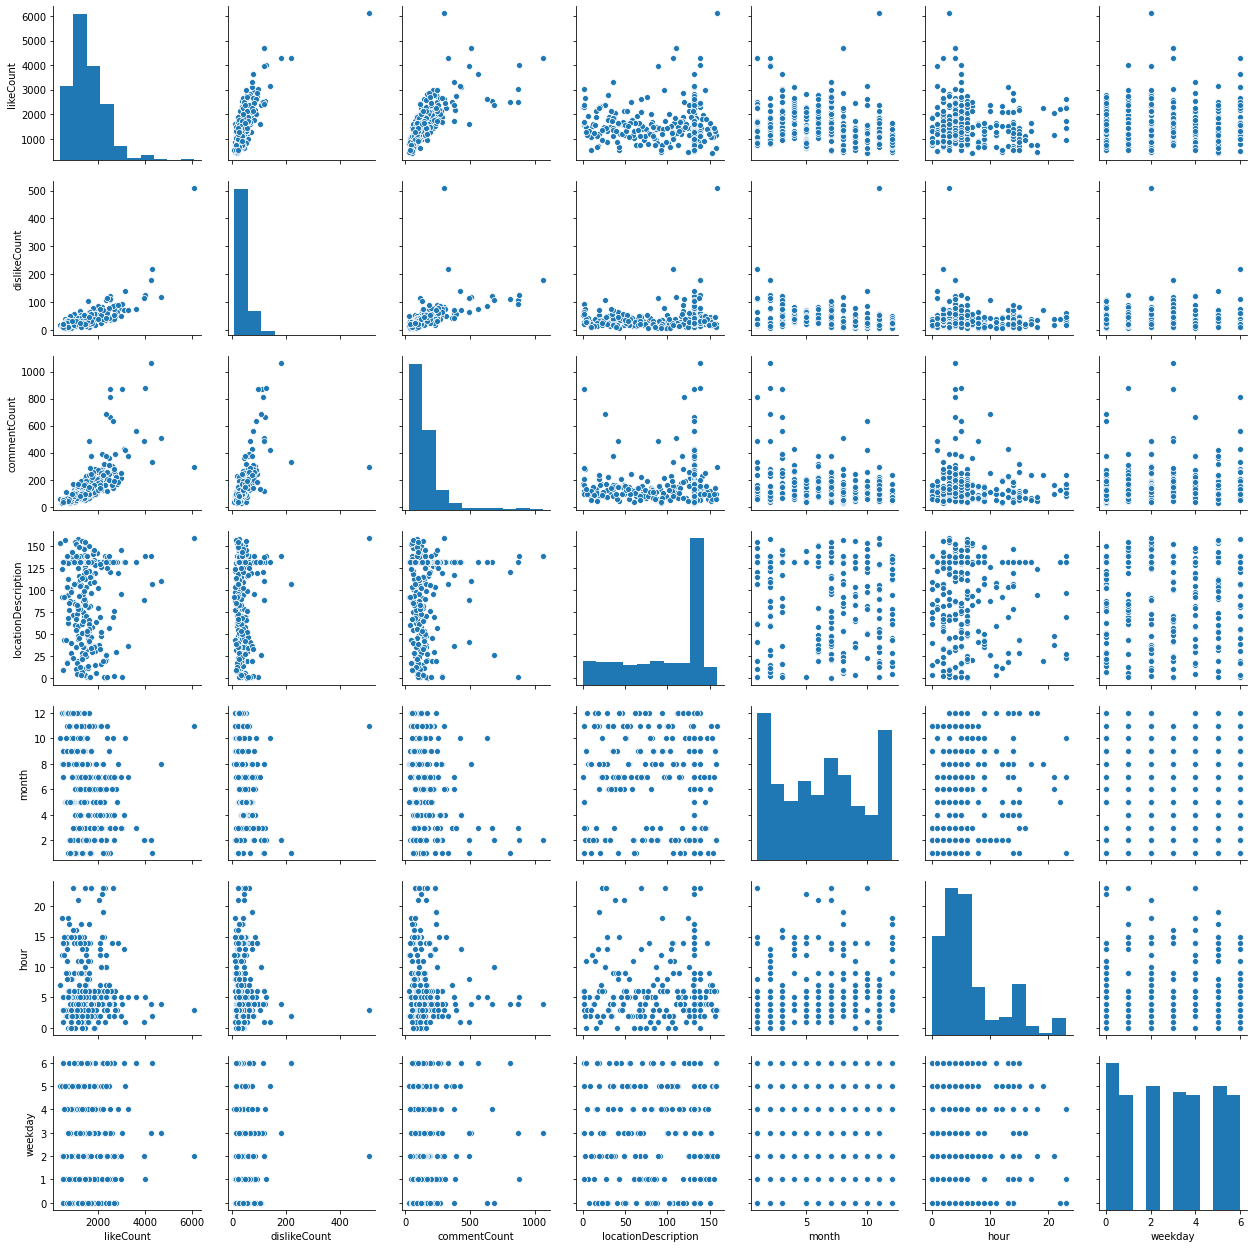

In [41]:
sns.pairplot(df1)

Generate additional features

like/dislike \
commentCount/dislike\
commentCount/like\
likeCount/hour \
dislike/hour \
commentCount/hour 

In [137]:
df1.columns

Index(['likeCount', 'dislikeCount', 'commentCount', 'locationDescription',
       'month', 'hour', 'weekday'],
      dtype='object')

In [138]:
df1['like_ratio'] = df1['likeCount']/df1['dislikeCount']
df1['comment_dislike'] = df1['commentCount']/df1['dislikeCount']
df1['comment_like'] = df1['commentCount']/df1['likeCount']
df1['like_hour'] = df1['hour']/df1['likeCount']
df1['dislike_hour'] = df1['hour']/df1['dislikeCount']
df1['comment_hour'] = df1['hour']/df1['commentCount']

In [139]:
df1.describe()

,likeCount,dislikeCount,commentCount,locationDescription,month,hour,weekday,like_ratio,comment_dislike,comment_like,like_hour,dislike_hour,comment_hour
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,1584.573826,41.526846,157.258389,97.285235,6.302013,6.422819,2.899329,45.524681,4.050198,0.094070,0.005219,0.233745,0.063437
std,749.411533,38.080381,140.221843,45.822478,3.360906,5.095296,2.035857,18.358913,1.782915,0.044159,0.005687,0.265833,0.072565
min,398.000000,7.000000,26.000000,0.000000,1.000000,0.000000,0.000000,12.017717,0.582677,0.033356,0.000000,0.000000,0.000000
25%,1100.000000,22.000000,83.250000,60.250000,3.000000,3.000000,1.000000,32.181978,2.712374,0.069416,0.001836,0.066667,0.019018
50%,1447.000000,33.000000,121.000000,122.500000,6.000000,5.000000,3.000000,43.269737,3.845238,0.084551,0.003211,0.142857,0.039293
75%,1949.250000,49.000000,171.500000,132.000000,9.000000,8.000000,5.000000,54.518939,4.937364,0.105266,0.006178,0.276197,0.077778
max,6105.000000,508.000000,1062.000000,159.000000,12.000000,23.000000,6.000000,147.181818,12.611111,0.346093,0.038217,1.714286,0.461538


In [140]:
df1.head()

,likeCount,dislikeCount,commentCount,locationDescription,month,hour,weekday,like_ratio,comment_dislike,comment_like,like_hour,dislike_hour,comment_hour
0,1425,21,91,74,8.0,5.0,5.0,67.857143,4.333333,0.063860,0.003509,0.238095,0.054945
1,1171,26,98,82,8.0,2.0,4.0,45.038462,3.769231,0.083689,0.001708,0.076923,0.020408
2,1485,41,78,25,8.0,6.0,3.0,36.219512,1.902439,0.052525,0.004040,0.146341,0.076923
3,1305,41,65,132,8.0,17.0,1.0,31.829268,1.585366,0.049808,0.013027,0.414634,0.261538
4,1902,70,283,119,8.0,6.0,1.0,27.171429,4.042857,0.148791,0.003155,0.085714,0.021201


In [141]:
df1 = df1.join(df_y)

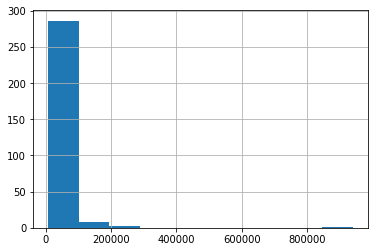

In [142]:
df1['viewCount'].hist()

In [143]:
df1 = df1[df1.viewCount < 400000]

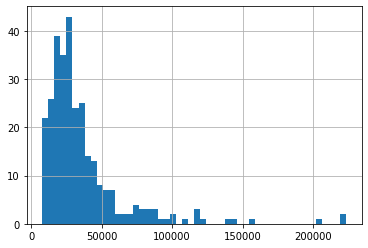

In [144]:
df1['viewCount'].hist(bins = 50)

In [145]:
df1.head()

,likeCount,dislikeCount,commentCount,locationDescription,month,hour,weekday,like_ratio,comment_dislike,comment_like,like_hour,dislike_hour,comment_hour,viewCount
0,1425,21,91,74,8.0,5.0,5.0,67.857143,4.333333,0.063860,0.003509,0.238095,0.054945,22958
1,1171,26,98,82,8.0,2.0,4.0,45.038462,3.769231,0.083689,0.001708,0.076923,0.020408,13821
2,1485,41,78,25,8.0,6.0,3.0,36.219512,1.902439,0.052525,0.004040,0.146341,0.076923,19513
3,1305,41,65,132,8.0,17.0,1.0,31.829268,1.585366,0.049808,0.013027,0.414634,0.261538,20763
4,1902,70,283,119,8.0,6.0,1.0,27.171429,4.042857,0.148791,0.003155,0.085714,0.021201,37401


In [146]:
y = df1['viewCount']
X = df1.drop('viewCount', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
model = LinearRegression()

In [148]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
result = model.predict(X_test)

In [150]:
print('MAE' ,mean_absolute_error(y_test, result))
print('MSE', mean_squared_error(y_test,result))
print('R2', r2_score(y_test,result))

MAE 7941.796437654413
MSE 132890843.09785065
R2 0.9077712747806662


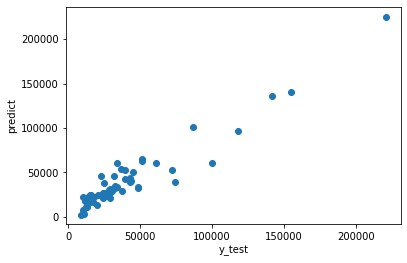

In [151]:
plt.xlabel('y_test')
plt.ylabel('predict')
plt.scatter(y_test, result)